# Customer Behavior Analysis

This project aimed to optimize sales strategies, targeting, and revenue by answering key business questions. The project employed various techniques including data cleaning, feature engineering, feature selection, and exploratory data analysis (EDA) using libraries such as Pandas, NumPy, Matplotlib, and Seaborn.

By applying these techniques, actionable insights were generated for industries. These insights enabled the optimization of sales strategies, effective customer targeting, and revenue maximization. Key findings included identifying peak sales months, determining top-performing countries, identifying optimal advertising times, and discovering frequently sold together products.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CBP/online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
sales_data = df

In [4]:
sales_data.shape

(525461, 8)

The dataset comprises "525,461" rows with the following columns of online retail information: Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, and Country.

In [5]:
sales_data = sales_data.drop(columns=['Invoice', 'Customer ID'])

The columns 'Invoice' and 'Customer ID' have been removed from the dataset since they are not deemed useful for the analysis.

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    525461 non-null  object        
 1   Description  522533 non-null  object        
 2   Quantity     525461 non-null  int64         
 3   InvoiceDate  525461 non-null  datetime64[ns]
 4   Price        525461 non-null  float64       
 5   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.1+ MB



Upon analyzing the data, it was observed that there are null values present in the "Description" column.

In [7]:
sales_data.isnull().sum()

StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Country           0
dtype: int64

Description columns contains "2928" null values. The column contains only text data. So I'm performing "dropna" function to remove all the rows that contains null values.

In [8]:
sales_data.dropna(axis=0, inplace=True)

In [9]:
sales_data.rename(columns = {'StockCode': 'ProductCode', 'Description': 'Product'}, inplace=True)

To enhance clarity and understanding, I have renamed the column 'StockCode' to 'ProductCode' and the column 'Description' to 'Product' in the dataset. This will make it easier to interpret the data during analysis.

In [10]:
sales_data.isnull().sum()

ProductCode    0
Product        0
Quantity       0
InvoiceDate    0
Price          0
Country        0
dtype: int64

In [11]:
sales_data.shape

(522533, 6)

After removing null values from "Product" we left with "522533" records

In [12]:
sales_data.head()

,ProductCode,Product,Quantity,InvoiceDate,Price,Country
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [13]:
sales_data.describe()

,Quantity,Price
count,522533.000000,522533.000000
mean,10.514312,4.715108
std,97.905985,146.535329
min,-9360.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


After examining the sales_data description, an inconsistency has been identified in the Quantity column's minimum values. The presence of negative numbers in the Quantity column is contradictory and does not align with logical sales transactions.

In [14]:
sales_data[['Quantity','Price']] = sales_data[['Quantity','Price']].abs()

This code will update both the 'Quantity' and 'Price' columns in the sales_data DataFrame with their absolute values, ensuring that all values are positive.

In [15]:
sales_data.describe()

,Quantity,Price
count,522533.000000,522533.000000
mean,11.920596,5.237762
std,97.744728,146.517578
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,53594.360000


# 1. What was the best month for Sale? How much profit did we get?

In [16]:
data_1 = sales_data

In [17]:
data_1.head()

,ProductCode,Product,Quantity,InvoiceDate,Price,Country
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [18]:
data_1['TotalPurchase'] = data_1.Quantity * data_1.Price

I have calculated a new column called 'TotalPurchase' in the sales_data dataset. To do this, I multiplied the values in the 'Quantity' column by the corresponding values in the 'Price' column. This calculation gives us the total amount spent on each purchase, which is now captured in the 'TotalPurchase' column.

In [19]:
data_1.head()

,ProductCode,Product,Quantity,InvoiceDate,Price,Country,TotalPurchase
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.8
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0


In [20]:
data_1 = data_1.iloc[:,[1, 0, 2, 4, -1, 5, 3]]

This code rearranges the columns in the 'data_1' DataFrame according to the specified column index positions. The new column order is as follows: Product,	ProductCode,	Quantity,	Price,	TotalPurchace,	Country and	InvoiceDate.

In [21]:
data_1.head()

,Product,ProductCode,Quantity,Price,TotalPurchase,Country,InvoiceDate
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,85048,12,6.95,83.4,United Kingdom,2009-12-01 07:45:00
1,PINK CHERRY LIGHTS,79323P,12,6.75,81.0,United Kingdom,2009-12-01 07:45:00
2,WHITE CHERRY LIGHTS,79323W,12,6.75,81.0,United Kingdom,2009-12-01 07:45:00
3,"RECORD FRAME 7"" SINGLE SIZE",22041,48,2.10,100.8,United Kingdom,2009-12-01 07:45:00
4,STRAWBERRY CERAMIC TRINKET BOX,21232,24,1.25,30.0,United Kingdom,2009-12-01 07:45:00


In [22]:
data_1['Months'] = data_1.InvoiceDate.dt.month
data_1['Year'] = data_1.InvoiceDate.dt.year
data_1['Day'] = data_1.InvoiceDate.dt.day
data_1.head()

,Product,ProductCode,Quantity,Price,TotalPurchase,Country,InvoiceDate,Months,Year,Day
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,85048,12,6.95,83.4,United Kingdom,2009-12-01 07:45:00,12,2009,1
1,PINK CHERRY LIGHTS,79323P,12,6.75,81.0,United Kingdom,2009-12-01 07:45:00,12,2009,1
2,WHITE CHERRY LIGHTS,79323W,12,6.75,81.0,United Kingdom,2009-12-01 07:45:00,12,2009,1
3,"RECORD FRAME 7"" SINGLE SIZE",22041,48,2.10,100.8,United Kingdom,2009-12-01 07:45:00,12,2009,1
4,STRAWBERRY CERAMIC TRINKET BOX,21232,24,1.25,30.0,United Kingdom,2009-12-01 07:45:00,12,2009,1


In [23]:
data_1 = data_1.drop(columns=['InvoiceDate'])

In [24]:
data_1.head()

,Product,ProductCode,Quantity,Price,TotalPurchase,Country,Months,Year,Day
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,85048,12,6.95,83.4,United Kingdom,12,2009,1
1,PINK CHERRY LIGHTS,79323P,12,6.75,81.0,United Kingdom,12,2009,1
2,WHITE CHERRY LIGHTS,79323W,12,6.75,81.0,United Kingdom,12,2009,1
3,"RECORD FRAME 7"" SINGLE SIZE",22041,48,2.10,100.8,United Kingdom,12,2009,1
4,STRAWBERRY CERAMIC TRINKET BOX,21232,24,1.25,30.0,United Kingdom,12,2009,1


In [25]:
monthly_total_purchase = data_1.groupby('Months')['TotalPurchase'].sum().astype('int64')

In [26]:
monthly_total_purchase = (monthly_total_purchase/1000000).round(2) # In Millions
monthly_total_purchase

Months
1     0.68
2     0.57
3     0.90
4     0.77
5     0.70
6     0.82
7     0.73
8     0.74
9     1.00
10    1.29
11    1.52
12    1.35
Name: TotalPurchase, dtype: float64

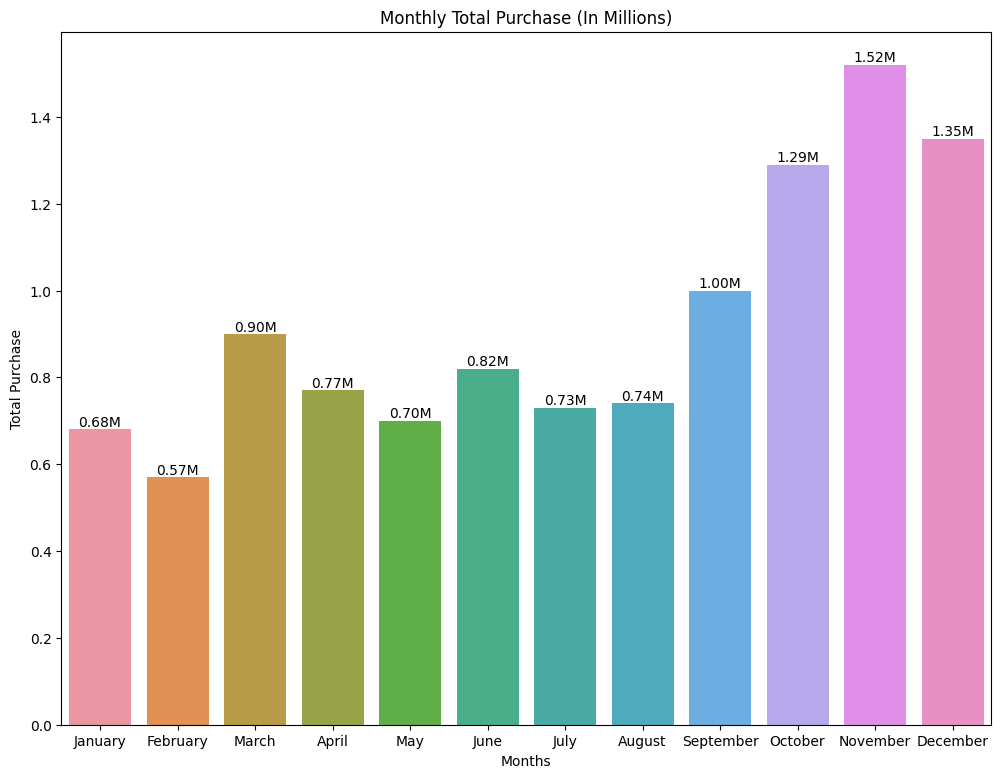

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 9))
ax = sns.barplot(x=monthly_total_purchase.index, y=monthly_total_purchase.values)

for i in ax.containers:
    plt.bar_label(i, fmt='%.2fM')

plt.xticks(range(0,12),labels=months)
plt.xlabel('Months')
plt.ylabel('Total Purchase')
plt.title('Monthly Total Purchase (In Millions)')
plt.show()

***The best month for sales was November, with a total purchase amount of $1.52 million. This indicates that November had the highest sales volume among all the months.***

# 2. What country had highest number of purchases?

In [28]:
data_2 = sales_data

In [29]:
data_2.head()

,ProductCode,Product,Quantity,InvoiceDate,Price,Country,TotalPurchase
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.8
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0


In [30]:
data_2.groupby('Country')['TotalPurchase'].sum()

Country
Australia                 32841.800
Austria                   13805.380
Bahrain                    2398.150
Belgium                   26450.630
Bermuda                    1253.140
Brazil                      268.270
Canada                     1216.660
Channel Islands           27725.320
Cyprus                    11563.050
Denmark                   54840.750
EIRE                     409712.910
Finland                    7571.210
France                   163653.080
Germany                  208500.291
Greece                    14386.370
Hong Kong                 12482.780
Iceland                    1323.320
Israel                     3199.400
Italy                     16345.520
Japan                     11008.080
Korea                      1287.200
Lebanon                     251.370
Lithuania                  4892.680
Malta                      8060.250
Netherlands              273708.590
Nigeria                     287.440
Norway                    43808.790
Poland              

In [31]:
country_sales = data_2.groupby('Country')['TotalPurchase'].sum().astype('int64').reset_index()
country_sales = country_sales.sort_values(by= 'TotalPurchase',ascending=False)
top_countries = country_sales.head(10)
top_countries  # Select top 10 countries with highest total purchases

,Country,TotalPurchase
37,United Kingdom,9497480
10,EIRE,409712
24,Netherlands,273708
13,Germany,208500
12,France,163653
31,Spain,58117
32,Sweden,55837
9,Denmark,54840
33,Switzerland,44499
26,Norway,43808


In [32]:
top_countries.TotalPurchase = (top_countries.TotalPurchase/1000000).round(2)

In [33]:
top_countries

,Country,TotalPurchase
37,United Kingdom,9.50
10,EIRE,0.41
24,Netherlands,0.27
13,Germany,0.21
12,France,0.16
31,Spain,0.06
32,Sweden,0.06
9,Denmark,0.05
33,Switzerland,0.04
26,Norway,0.04


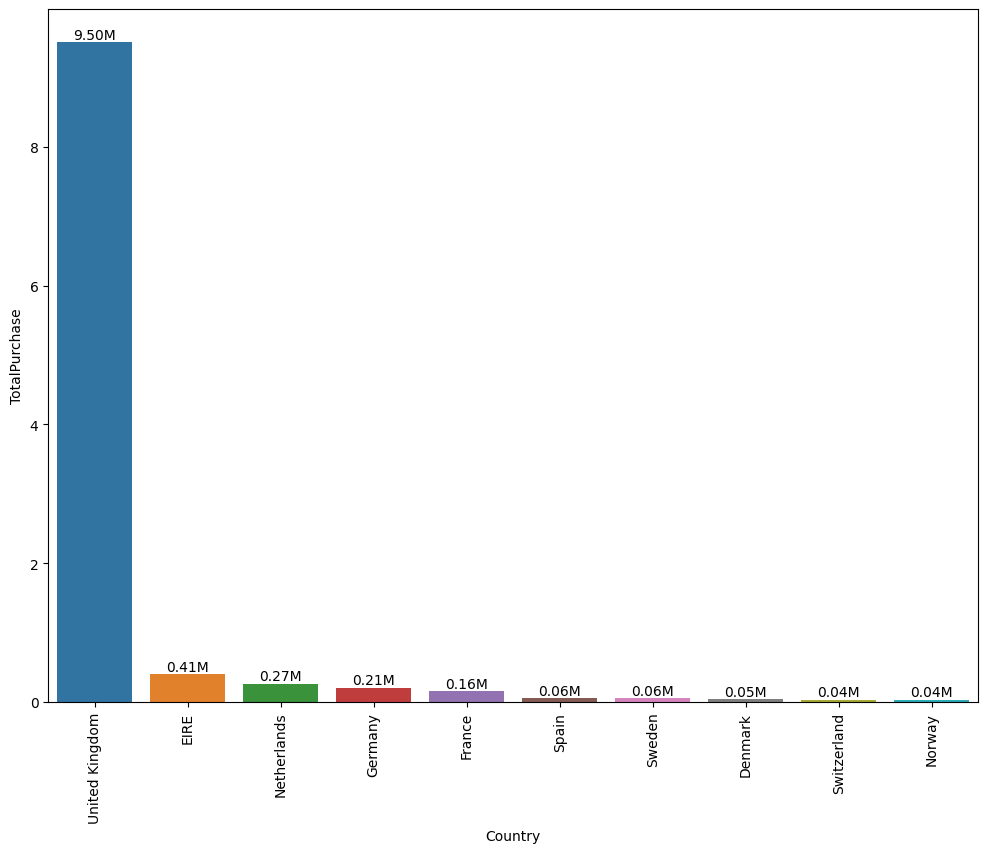

In [34]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(y=top_countries.TotalPurchase, x=top_countries.Country)
for i in ax.containers:
  plt.bar_label(i, fmt='%.2fM')
plt.xticks(rotation=90)
plt.show()

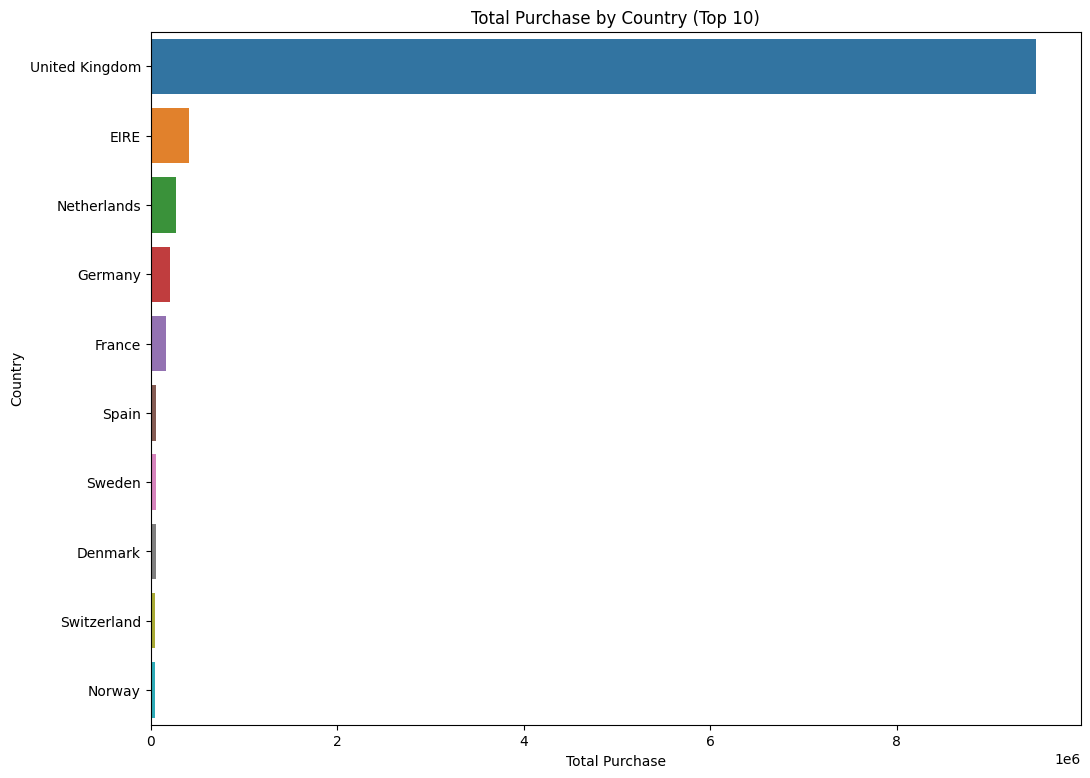

In [35]:
top_countries = country_sales.head(10)  # Select top 10 countries with highest total purchases

plt.figure(figsize=(12, 9))
ax = sns.barplot(x=top_countries.TotalPurchase, y=top_countries.Country)
plt.xlabel('Total Purchase')
plt.ylabel('Country')
plt.title('Total Purchase by Country (Top 10)')
plt.show()

# 3. What time we should display advertisements to maximize the likelyhood of customer buying the product?

In [36]:
sales_data['Hour'] = sales_data.InvoiceDate.dt.hour
sales_data.head()

,ProductCode,Product,Quantity,InvoiceDate,Price,Country,TotalPurchase,Hour
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4,7
1,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0,7
2,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0,7
3,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.8,7
4,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0,7


In [38]:
hourly_purchase = sales_data.groupby('Hour')['TotalPurchase'].count().reset_index()

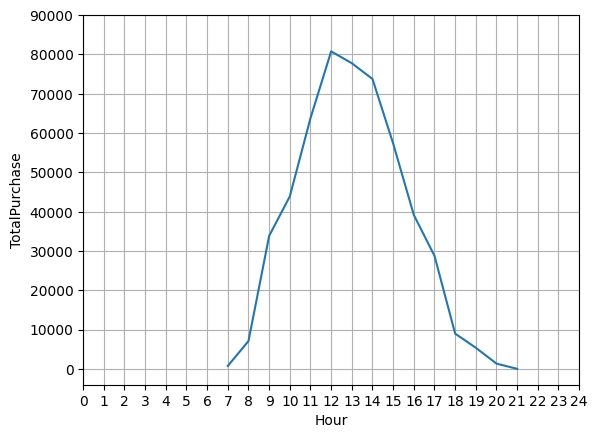

In [39]:
sns.lineplot(x=hourly_purchase.Hour, y=hourly_purchase.TotalPurchase)
plt.xticks(range(0,25,1))
plt.yticks(range(0,100000, 10000))
plt.grid()
plt.show()

Overall, this project provided valuable insights to businesses, empowering them to make data-driven decisions and enhance their sales strategies, targeting efforts, and revenue generation.